# Zero to Hero

## 1.07 Aplicando el arbol

Se aplicará el modelo generado por rpart a los datos nuevos y se genera la salida para Kaggle

In [2]:
rm( list=ls())
gc()

library( "data.table")   #cargo la libreria  data.table
library( "rpart")  #cargo la libreria  rpart
library( "rpart.plot")

options(repr.plot.width=20, repr.plot.height=10) 
setwd("~/MEDGC/13_LaboratorioImplementacion1/")  #Aqui se debe poner la ruta de la PC local

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,598228,32.0,1163147,62.2,1163147,62.2
Vcells,1082770,8.3,8388608,64.0,1650550,12.6


In [3]:
dtrain <- data.table::fread("./datasets/paquete_premium_202011.csv") # cargo el dataset

In [5]:
# genero el modelo
modelo <- rpart::rpart(
    formula = "clase_ternaria ~ .",
    data = dtrain,
    xval = 0,
    cp = -1,
    maxdepth = 2
)

Cargo el dataset a donde voy a aplicar el modelo

In [6]:
dapply <- data.table::fread("./datasets/paquete_premium_202101.csv") # cargo el dataset

Aplico el modelo a los datos dapply  pidiendo que me devuelva probabildades

In [7]:
prediccion <- predict(modelo, dapply, type = "prob")

Analizo que queda en prediccion

In [8]:
head(prediccion)

,BAJA+1,BAJA+2,CONTINUA
1,0.0007027639,0.001083083,0.9982142
2,0.0007027639,0.001083083,0.9982142
3,0.0007027639,0.001083083,0.9982142
4,0.0007027639,0.001083083,0.9982142
5,0.0007027639,0.001083083,0.9982142
6,0.0007027639,0.001083083,0.9982142


Prediccion es una matriz; me interesa la columna "BAJA+2"  que es la probabilidad que modelo asigna a cada registro de dapply

In [9]:
prob_baja2 <- prediccion[, "BAJA+2"]

In [10]:
head(prob_baja2)

1           2           3           4           5           6 
0.001083083 0.001083083 0.001083083 0.001083083 0.001083083 0.001083083

prob_baja2 es el vector de probabilidades

In [11]:
length(prob_baja2)
nrow(dapply)

[1] 160607

[1] 160607

Ahora decido si envio el estimulo o no
<br>
si prob( BAJA+2) > 0.025  envio  el estímulo

In [12]:
Predicted <- ifelse(prob_baja2 > 1 / 60, 1, 0)

In [13]:
head(Predicted)

1 2 3 4 5 6 
0 0 0 0 0 0

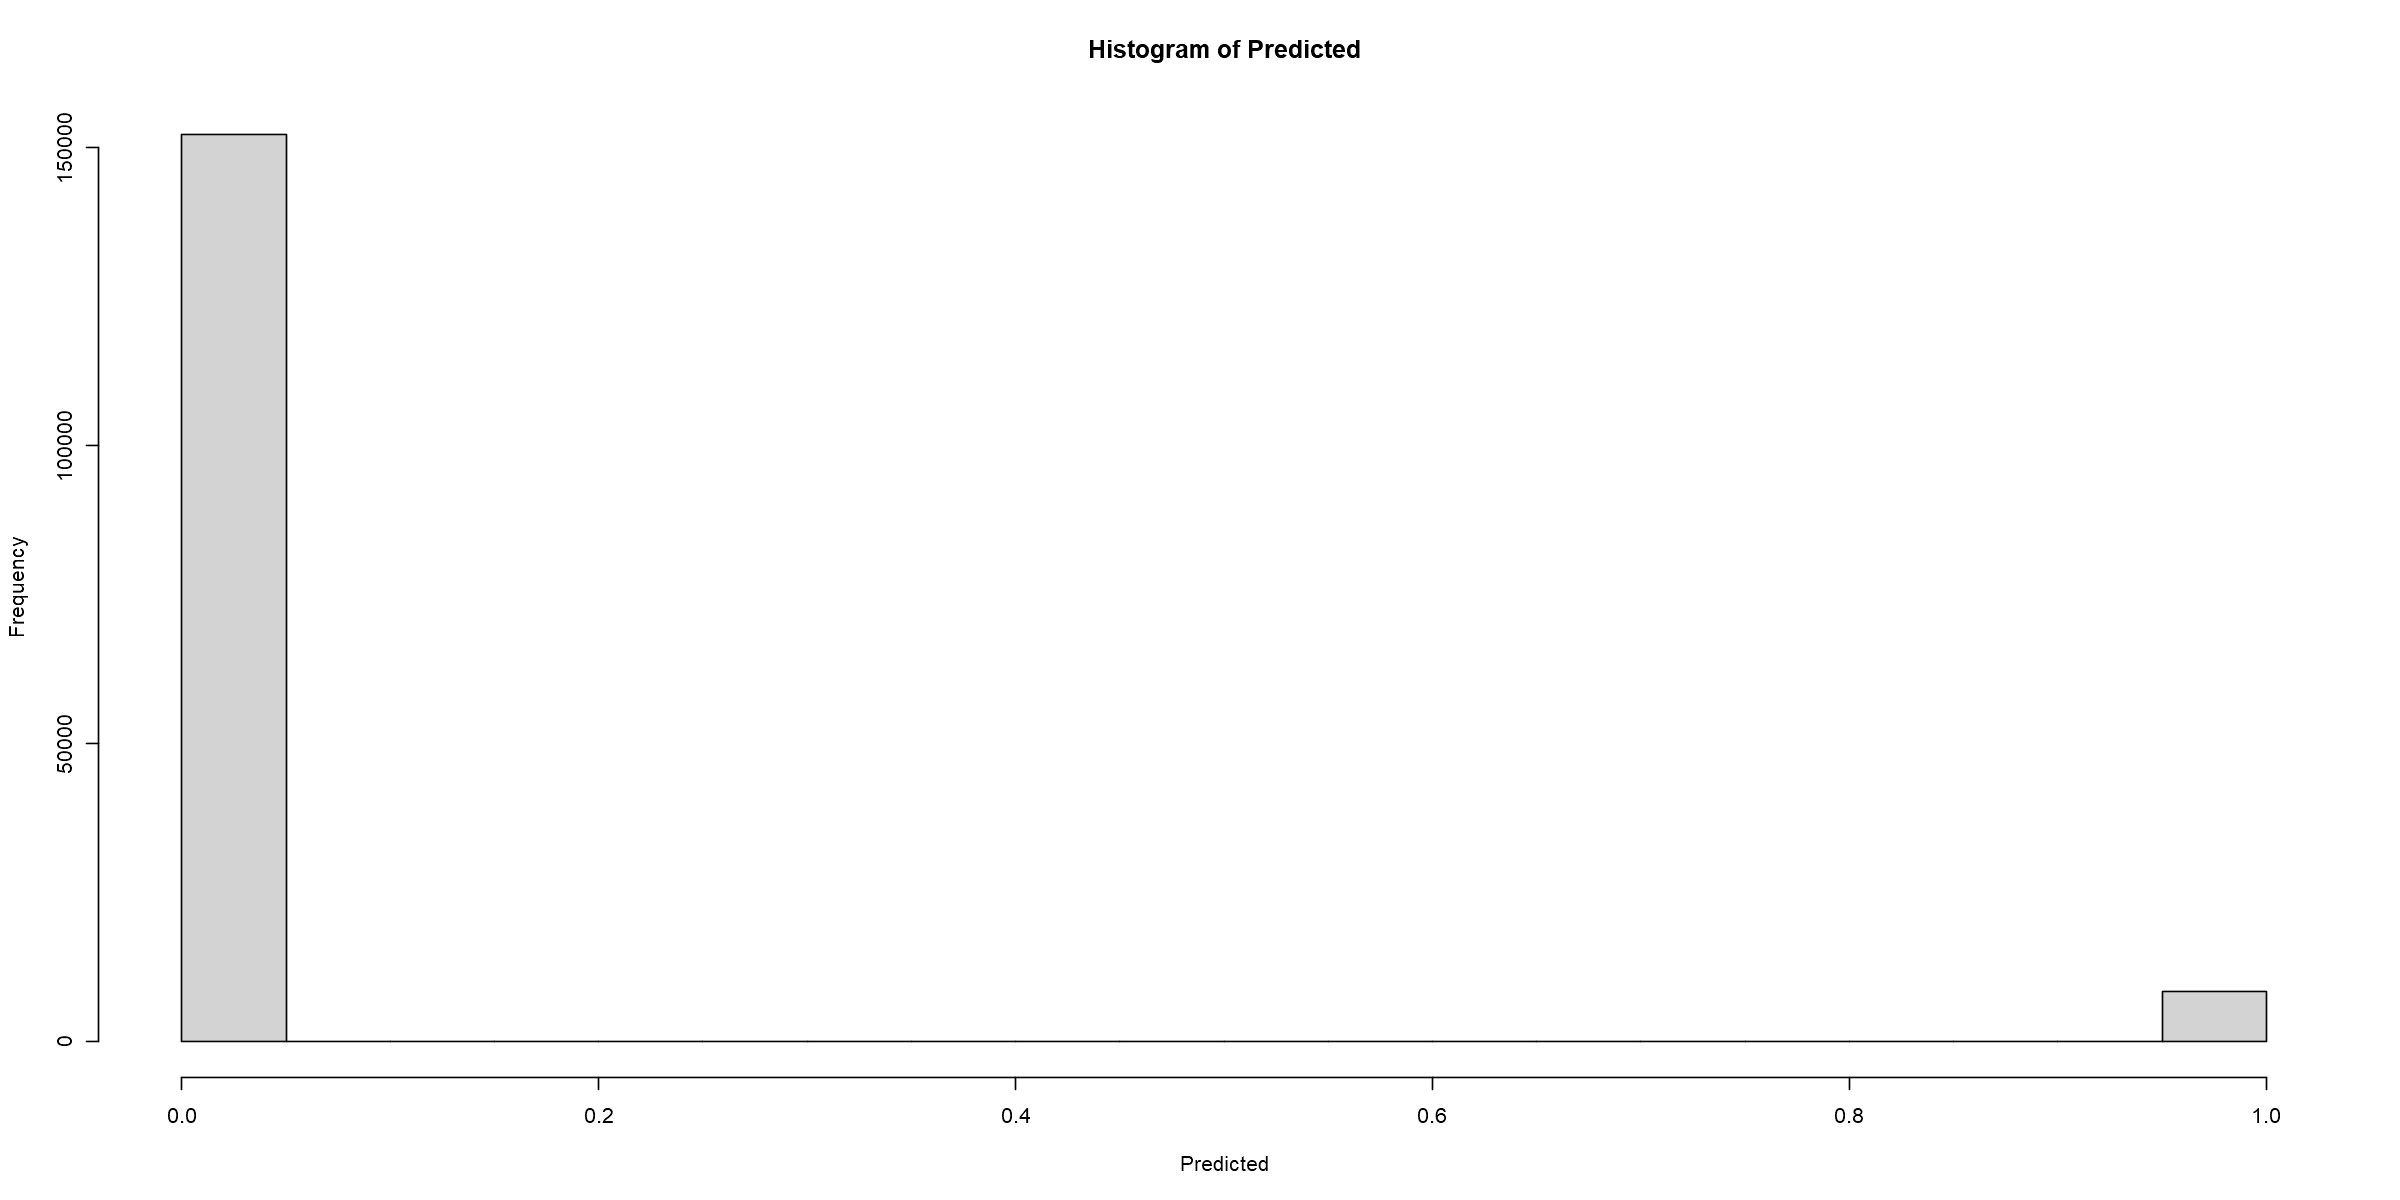

In [14]:
hist(Predicted)

creo una tabla con  lo que voy a enviar a Kaggle

In [15]:
entrega <- as.data.table(list("numero_de_cliente" = dapply$numero_de_cliente, "Predicted" = Predicted))

In [16]:
head(entrega)

numero_de_cliente,Predicted
<int>,<dbl>
4572300,0
4572957,0
4572973,0
4572998,0
4573029,0
4573199,0


In [17]:
entrega[, .N, Predicted]

Predicted,N
<dbl>,<int>
0,152235
1,8372


Esto significa que se enviaran 8157 estímulos

In [18]:
# genero el archivo para Kaggle
# creo la carpeta donde va el experimento
dir.create("./labo/exp/", showWarnings = FALSE)
dir.create("./labo/exp/ZH2017/", showWarnings = FALSE)

fwrite(entrega,
        file = "./labo/exp/ZH2017/para_Kaggle_0107.csv",
        sep = ","
)

Subiendo a Kaggle la prediccion anterior se obtiene en el Public Leaderboard 13.87474